<a href="https://colab.research.google.com/github/panxiaofan/Advanced-Mahchine-Perception/blob/master/CIS680_Fall2020_HW1_b_Answer_4.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Drive

This first code block attaches your google drive and makes a folder structure. You only need to run this when a new VM is assigned to you. To get your code as a single python file go through the following menus File->'Download .py'

In [3]:
import os
from google.colab import drive

# Mount google drive
DRIVE_MOUNT='../content/gdrive'
drive.mount(DRIVE_MOUNT)


# create folder to write data to
CIS680_FOLDER=os.path.join(DRIVE_MOUNT, 'My Drive', 'CIS680_2020')
HOMEWORK_FOLDER=os.path.join(CIS680_FOLDER, 'HW1')
os.makedirs(HOMEWORK_FOLDER, exist_ok=True)

Mounted at ../content/gdrive


# PyTorch

This code block imports torch and torchvision which provide the libraries for use down below. PyTorch provides many utilities such as standard datasets, for this exercise we will use MNIST. Please see the torchvision documentation for how to instantiate the training and testing data split.

In [4]:
# torch and torchvision imports
import torch
import torchvision
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

# 3) Train a Convolutional Neural Network

In [5]:
# Create your network here
class HelloWorld(torch.nn.Module):
  def __init__(self):
    super(HelloWorld, self).__init__()
    self.layer1 = nn.Sequential()                                        # 28 *28 *1
    self.layer1.add_module("Conv1", nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5, padding=2))   # 28 *28 *32
    self.layer1.add_module("BN1", nn.BatchNorm2d(num_features=32))
    self.layer1.add_module("Relu1", nn.ReLU())
    self.layer1.add_module("Pool1", nn.AvgPool2d(kernel_size=2, stride=2, padding=0))             # 14 *14 *32 
                                                 
    self.layer2 = nn.Sequential()   
    self.layer2.add_module("Conv2", nn.Conv2d(in_channels=32, out_channels=32, kernel_size=5, padding=2))  # 14 *14 *32
    self.layer2.add_module("BN2", nn.BatchNorm2d(num_features=32))
    self.layer2.add_module("Relu2", nn.ReLU())
    self.layer2.add_module("Pool2", nn.AvgPool2d(kernel_size=2, stride=2, padding=0))            # 7 *7 *32

    self.layer3 = nn.Sequential()
    self.layer3.add_module("Conv3", nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, padding=2))  # 7 *7 *64
    self.layer3.add_module("BN3", nn.BatchNorm2d(num_features=64))
    self.layer3.add_module("Relu3", nn.ReLU())
    self.layer3.add_module("Pool3", nn.AvgPool2d(kernel_size=2, stride=2, padding=0))         # 3 *3 *64

    self.fully_connected1 = nn.Sequential()
    self.fully_connected1.add_module("FC1", nn.Linear(in_features=3 * 3 * 64, out_features=64))  
    self.fully_connected1.add_module("BNFC1", nn.BatchNorm1d(64))
    self.fully_connected1.add_module("ReluFC1", nn.ReLU())

    self.fully_connected2 = nn.Sequential()
    self.fully_connected2.add_module("FC2", nn.Linear(in_features=64, out_features=10))
    self.fully_connected2.add_module("SoftMax", nn.Softmax())

  
  def forward(self, x):
    x = self.layer1(x)
    x = self.layer2(x)
    x = self.layer3(x)
    x = x.view(-1, 3 * 3 * 64)
    x = self.fully_connected1(x)
    x = self.fully_connected2(x)
    return x
  

In [7]:
batch_size_train = 64
batch_size_test = 1000
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST(root='.', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.5,), (0.5,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST(root='.', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.5,), (0.5,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

In [6]:
def train(epoch):
    my_first_network.train()
    running_loss = 0
    running_correct = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = my_first_network(data)
        loss = error(output, target) 
        running_loss += loss.item() * data.size(0)
        loss.backward()
        optimizer.step()
        predicted = torch.max(output.data, 1)[1] 
        running_correct += (predicted == target).sum()
        if batch_idx % display_interval == 0:
          print('Epoch : {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\t Accuracy:{:.3f}%'.format(
                    epoch, batch_idx*len(data), len(train_loader.dataset), 100.*batch_idx / len(train_loader), loss.item(), float(running_correct*100) / float(batch_size_train*(batch_idx + 1))))
    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_accu = float(running_correct) / len(train_loader.dataset)
    train_losses.append(epoch_loss)
    train_accuracy.append(epoch_accu)
    print('\nTrain set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        epoch_loss, running_correct, len(train_loader.dataset),
        100. * running_correct / len(train_loader.dataset)))
def test(epoch):
  my_first_network.eval()
  running_loss = 0
  running_correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      data, target = data.to(device), target.to(device)
      output = my_first_network(data)
      running_loss += error(output, target).item()* data.size(0)
      predicted = torch.max(output.data, 1)[1] 
      running_correct += (predicted == target).sum()
  epoch_loss = running_loss / len(test_loader.dataset)
  epoch_accu = float(running_correct) / len(test_loader.dataset)
  test_losses.append(epoch_loss)
  test_accuracy.append(epoch_accu)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    epoch_loss, running_correct, len(test_loader.dataset),
    100. * running_correct / len(test_loader.dataset)))
  is_new_best(epoch_accu)
def is_new_best(epoch_accu):
  if (epoch_accu > 0.99 and epoch_accu == max(test_accuracy)):
    PATH = HOMEWORK_FOLDER+'/pre-trained model'
    torch.save(my_first_network.state_dict(), PATH)

# Instantiate your network here
torch.manual_seed(42)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
my_first_network = HelloWorld().to(device)
learning_rate = 0.002
optimizer = torch.optim.Adam(my_first_network.parameters(),lr=learning_rate)
error = nn.CrossEntropyLoss()
display_interval = 50
train_losses = []
train_accuracy = []
test_losses = []
test_accuracy = []
# Train your network here
num_epochs = 5
for epoch in range(num_epochs):
  train(epoch)
  test(epoch)

**Training & Testing Loss**

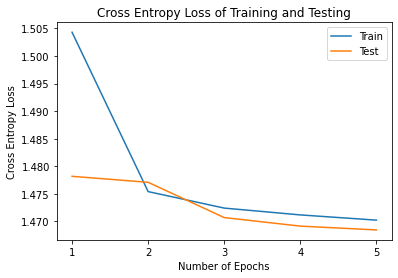

In [12]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(np.arange(1, num_epochs + 1), np.array(train_losses))
plt.plot(np.arange(1, num_epochs + 1), np.array(test_losses))
plt.legend(['Train','Test'], loc='upper right')
plt.xlabel('Number of Epochs')
plt.ylabel('Cross Entropy Loss')
plt.xticks(range(1,num_epochs + 1))
plt.title('Cross Entropy Loss of Training and Testing')
plt.savefig(HOMEWORK_FOLDER+'/Cross Entropy Loss of Training and Testing.png')
plt.show()

**Training & Testing Accuracy**

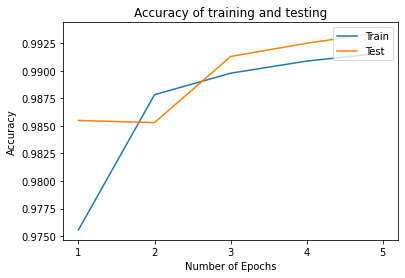

In [13]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(np.arange(1, num_epochs + 1), np.array(train_accuracy))
plt.plot(np.arange(1, num_epochs + 1), np.array(test_accuracy))
plt.legend(['Train','Test'], loc='upper right')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.xticks(range(1,num_epochs + 1))
plt.title('Accuracy of training and testing')
plt.savefig(HOMEWORK_FOLDER+'/Accuracy of training and testing.png')
plt.show()

In [14]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
PATH = HOMEWORK_FOLDER+'/pre-trained model'
model = HelloWorld()
model.load_state_dict(torch.load(PATH))
model.to(device)

running_loss = 0
running_correct = 0
with torch.no_grad():
  for data, target in test_loader:
    data, target = data.to(device), target.to(device)
    output = model(data)
    running_loss += error(output, target).item()* data.size(0)
    predicted = torch.max(output.data, 1)[1] 
    running_correct += (predicted == target).sum()
epoch_loss = running_loss / len(test_loader.dataset)
epoch_accu = float(running_correct) / len(test_loader.dataset)

print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
  epoch_loss, running_correct, len(test_loader.dataset),
  100. * running_correct / len(test_loader.dataset)))
is_new_best(epoch_accu)

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:117: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)



Test set: Avg. loss: 1.4685, Accuracy: 9932/10000 (99%)



# **Q 4.1**

CUDA Available:  True
true label: 9 
torch.Size([1, 1, 28, 28])


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:117: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


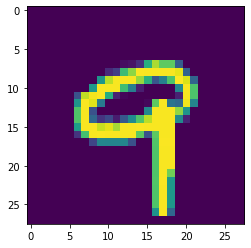


loss: 1.461, current_predict_label: 9


loss: 1.461, current_predict_label: 9


loss: 2.196, current_predict_label: 4

misclassified label: 4 


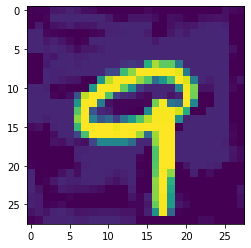

true label: 5 
torch.Size([1, 1, 28, 28])


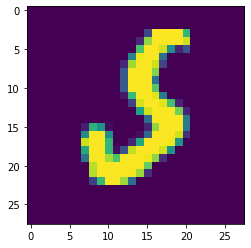


loss: 1.461, current_predict_label: 5


loss: 1.486, current_predict_label: 5

misclassified label: 6 


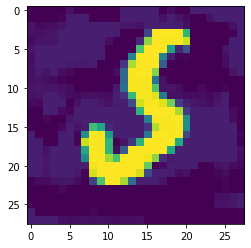

<Figure size 432x288 with 0 Axes>

In [92]:
  # Define what device we are using
  print("CUDA Available: ",torch.cuda.is_available())
  use_cuda=True
  device = torch.device("cuda" if (use_cuda and torch.cuda.is_available()) else "cpu")

  # Set the model in evaluation mode. In this case this is for the Dropout layers
  PATH = HOMEWORK_FOLDER+'/pre-trained model'
  model = HelloWorld().to(device)
  model.load_state_dict(torch.load(PATH))
  model.eval()
  test_loader_each = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST(root='.', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.5,), (0.5,))
                             ])),
  batch_size=1, shuffle=True)

  def fgsm_attack(input_image, epsilon, perturbation_grad, perturbation):
    sign_perturbation_grad = torch.sign(perturbation_grad.data)
    perturbation.data += torch.clamp(epsilon * sign_perturbation_grad, min = 0, max = 1)
    perturbed_image = input_image +  perturbation.data
    perturbed_image = torch.clamp(perturbed_image, -1, 1)
    perturbation.data = perturbed_image - input_image
    return perturbation

  error = nn.CrossEntropyLoss()
  fig = plt.figure()
  for i in range(2):  
    test_iterator=iter(test_loader_each)
    test_images, test_labels=test_iterator.next()
    test_images, test_labels=test_images.to(device), test_labels.to(device)
    output = model(test_images)
    predicted = torch.max(output.data, 1)[1] 
    print("true label: {} ".format(predicted.detach().cpu().item()))
    orig_images=test_images.detach().cpu()
    print(orig_images.size())
    orig_images = np.squeeze(orig_images)
    plt.imshow(orig_images)
    plt.savefig(HOMEWORK_FOLDER+'/No.'+ str(i)+' untarget_attack_original_image.png')
    plt.show()
    # Accuracy counter
    epsilon = 0.001
    num_training_episode = 100000
    data = test_images
    target = test_labels
    model.eval()

    # Send the data and label to the device
    data, target = data.to(device), target.to(device)
    perturbation = torch.zeros(data.shape).to(device)
    perturbation.requires_grad = True

    # If the initial prediction is wrong, dont bother attacking, just move on
    if predicted.item() == target.item():
      for j in range(num_training_episode):
          model.zero_grad()
          output = model(data + perturbation)
          loss = error(output, target)
          loss.backward()
          perturbation_grad = perturbation.grad.data
          # Call FGSM Attack
          perturbation = fgsm_attack(data, epsilon, perturbation_grad, perturbation)
          
          # Re-classify the perturbed image
          output = model(data + perturbation)
          predicted = torch.max(output.data, 1)[1]  # get the index of the max log-probability
                    
          # Calculate the loss       
          if j % 100 == 1:
            print('\nloss: {:.3f}, current_predict_label: {}\n'.format(
            loss.detach().cpu().item(), predicted.detach().cpu().item()))

          if predicted.item() != target.item() and torch.max(output.data)>= 0.9:
            print("misclassified label: {} ".format(predicted.detach().cpu().item()))
            final_perturbed_image = (data + perturbation).detach().cpu()
            final_perturbed_image = np.squeeze(final_perturbed_image)
            plt.imshow(final_perturbed_image)
            plt.show() 
            plt.savefig(HOMEWORK_FOLDER+'/No.'+ str(i)+' untarget_attack_new_image.png')
            break


# Q 4.2

CUDA Available:  True


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:117: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


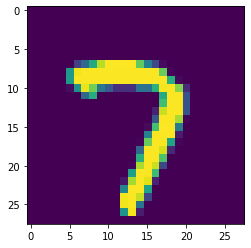


true label: 7, initial predict: 7


loss: -2.461, current_predict_label: 9


true label: 7, initial predict: 7,target label:4



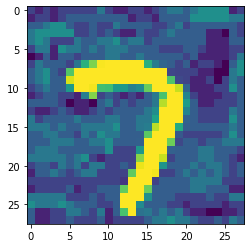

<Figure size 432x288 with 0 Axes>

In [95]:
  def fgsm_attack(input_image, epsilon, perturbation_grad, perturbation):
    sign_perturbation_grad = torch.sign(perturbation_grad.data)
    perturbation.data += torch.clamp(epsilon * sign_perturbation_grad, min = 0, max = 1)
    perturbed_image = input_image +  perturbation.data
    perturbed_image = torch.clamp(perturbed_image, -1, 1)
    perturbation.data = perturbed_image - input_image
    return perturbation
  # Define what device we are using
  print("CUDA Available: ",torch.cuda.is_available())
  use_cuda=True
  device = torch.device("cuda" if (use_cuda and torch.cuda.is_available()) else "cpu")

  # Set the model in evaluation mode. In this case this is for the Dropout layers
  PATH = HOMEWORK_FOLDER+'/pre-trained model'
  model = HelloWorld().to(device)
  model.load_state_dict(torch.load(PATH))
  model.eval()
  test_loader_each = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST(root='.', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.5,), (0.5,))
                             ])),
  batch_size=1, shuffle=True)

  test_iterator=iter(test_loader_each)
  test_images, test_labels=test_iterator.next()
  test_images, test_labels=test_images.to(device), test_labels.to(device)
  output = model(test_images)
  initial_predicted = torch.max(output.data, 1)[1] 
  orig_images=test_images.detach().cpu()
  orig_images = np.squeeze(orig_images)
  plt.imshow(orig_images)
  plt.savefig(HOMEWORK_FOLDER+'/target_attack_original_image.png')
  plt.show()
  print('\ntrue label: {}, initial predict: {}\n'.format(test_labels.detach().cpu().item(), initial_predicted.detach().cpu().item()))

  epsilon = 0.2
  num_training_episode = 100000
  data = test_images
  y_truth = test_labels
  target = torch.tensor([4])
  model.eval()
  model.to(device)
  error = nn.CrossEntropyLoss()

  # Send the data and label to the device
  data, target = data.to(device), target.to(device)
  perturbation = torch.zeros(data.shape).to(device)
  perturbation.requires_grad = True

  # If the initial prediction is wrong, dont bother attacking, just move on
  if initial_predicted.item() != target.item():
    for j in range(num_training_episode):
        model.zero_grad()
        output = model(data + perturbation)
        loss = -error(output, target)
        loss.backward()
        perturbation_grad = perturbation.grad.data
        # Call FGSM Attack
        perturbation = fgsm_attack(data, epsilon, perturbation_grad, perturbation)
        
        # Re-classify the perturbed image
        output = model(data + perturbation)
        predicted = torch.max(output.data, 1)[1]  # get the index of the max log-probability
                  
        # Calculate the loss       
        if j % 100 == 1:
          print('\nloss: {:.3f}, current_predict_label: {}\n'.format(
          loss.detach().cpu().item(), predicted.detach().cpu().item()))
        if predicted.item() == target.item():
          print('\ntrue label: {}, initial predict: {},target label:{}\n'.format(
              y_truth.detach().cpu().item(), initial_predicted.detach().cpu().item(),target.detach().cpu().item()))
          final_perturbed_image = (data + perturbation).detach().cpu()
          final_perturbed_image = np.squeeze(final_perturbed_image)
          plt.imshow(final_perturbed_image)
          plt.show() 
          plt.savefig(HOMEWORK_FOLDER+'/target_attack_new_image.png')
          break


# **Retrain network**

In [82]:
def train(epoch):
    my_first_network.train()
    running_loss = 0
    running_correct = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = my_first_network(data)
        loss = error(output, target) 
        running_loss += loss.item() * data.size(0)
        loss.backward()
        optimizer.step()
        predicted = torch.max(output.data, 1)[1] 
        running_correct += (predicted == target).sum()
        if batch_idx % display_interval == 0:
          print('Epoch : {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\t Accuracy:{:.3f}%'.format(
                    epoch, batch_idx*len(data), len(train_loader.dataset), 100.*batch_idx / len(train_loader), loss.item(), float(running_correct*100) / float(batch_size_train*(batch_idx + 1))))
    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_accu = float(running_correct) / len(train_loader.dataset)
    train_losses.append(epoch_loss)
    train_accuracy.append(epoch_accu)
    print('\nTrain set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        epoch_loss, running_correct, len(train_loader.dataset),
        100. * running_correct / len(train_loader.dataset)))
def test(epoch):
  my_first_network.eval()
  running_loss = 0
  running_correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      data, target = data.to(device), target.to(device)
      output = my_first_network(data)
      running_loss += error(output, target).item()* data.size(0)
      predicted = torch.max(output.data, 1)[1] 
      running_correct += (predicted == target).sum()
  epoch_loss = running_loss / len(test_loader.dataset)
  epoch_accu = float(running_correct) / len(test_loader.dataset)
  test_losses.append(epoch_loss)
  test_accuracy.append(epoch_accu)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    epoch_loss, running_correct, len(test_loader.dataset),
    100. * running_correct / len(test_loader.dataset)))
  is_new_best(epoch_accu)
def is_new_best(epoch_accu):
  if (epoch_accu > 0.99 and epoch_accu == max(test_accuracy)):
    PATH = HOMEWORK_FOLDER+'/re-trained model'
    torch.save(my_first_network.state_dict(), PATH)

# Instantiate your network here
torch.manual_seed(0)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
my_first_network = HelloWorld().to(device)
learning_rate = 0.002
optimizer = torch.optim.Adam(my_first_network.parameters(),lr=learning_rate)
error = nn.CrossEntropyLoss()
display_interval = 50
train_losses = []
train_accuracy = []
test_losses = []
test_accuracy = []
# Train your network here
num_epochs = 5
for epoch in range(num_epochs):
  train(epoch)
  test(epoch)

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:117: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Epoch : 0 [0/60000 (0%)]	Loss: 2.307219	 Accuracy:7.812%
Epoch : 0 [3200/60000 (5%)]	Loss: 1.554251	 Accuracy:86.275%
Epoch : 0 [6400/60000 (11%)]	Loss: 1.503859	 Accuracy:91.352%
Epoch : 0 [9600/60000 (16%)]	Loss: 1.500562	 Accuracy:93.440%
Epoch : 0 [12800/60000 (21%)]	Loss: 1.469090	 Accuracy:94.504%
Epoch : 0 [16000/60000 (27%)]	Loss: 1.507271	 Accuracy:95.182%
Epoch : 0 [19200/60000 (32%)]	Loss: 1.514858	 Accuracy:95.660%
Epoch : 0 [22400/60000 (37%)]	Loss: 1.500023	 Accuracy:95.989%
Epoch : 0 [25600/60000 (43%)]	Loss: 1.495893	 Accuracy:96.236%
Epoch : 0 [28800/60000 (48%)]	Loss: 1.468526	 Accuracy:96.435%
Epoch : 0 [32000/60000 (53%)]	Loss: 1.470120	 Accuracy:96.616%
Epoch : 0 [35200/60000 (59%)]	Loss: 1.464085	 Accuracy:96.770%
Epoch : 0 [38400/60000 (64%)]	Loss: 1.492920	 Accuracy:96.885%
Epoch : 0 [41600/60000 (69%)]	Loss: 1.482687	 Accuracy:97.000%
Epoch : 0 [44800/60000 (75%)]	Loss: 1.495006	 Accuracy:97.100%
Epoch : 0 [48000/60000 (80%)]	Loss: 1.468948	 Accuracy:97.202%
Ep

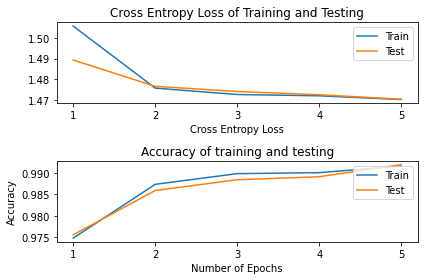

In [91]:
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 1)
axs[0].plot(np.arange(1, num_epochs + 1), np.array(train_losses))
axs[0].plot(np.arange(1, num_epochs + 1), np.array(test_losses))
axs[0].legend(['Train','Test'], loc='upper right')
axs[0].set_xlabel('Number of Epochs')
axs[0].set_xlabel('Cross Entropy Loss')
axs[0].set_xticks(range(1,num_epochs + 1))
axs[0].set_title('Cross Entropy Loss of Training and Testing')

axs[1].plot(np.arange(1, num_epochs + 1), np.array(train_accuracy))
axs[1].plot(np.arange(1, num_epochs + 1), np.array(test_accuracy))
axs[1].legend(['Train','Test'], loc='upper right')
axs[1].set_xlabel('Number of Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].set_xticks(range(1,num_epochs + 1))
axs[1].set_title('Accuracy of training and testing')

plt.savefig(HOMEWORK_FOLDER+'/training and testing curve.png')
plt.tight_layout()
plt.show()

true label: tensor([9, 9, 4, 3, 0, 5, 9, 2]) 
predicted label: tensor([9, 9, 4, 3, 0, 5, 9, 2]) 


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:117: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


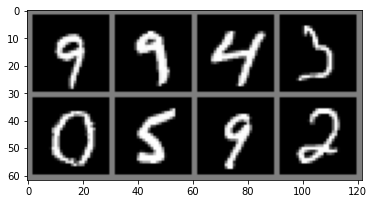


loss: 1.461, current_predict_label: tensor([9, 9, 4, 3, 0, 5, 9, 2])


loss: 1.575, current_predict_label: tensor([9, 9, 4, 5, 0, 5, 9, 2])


loss: 1.967, current_predict_label: tensor([4, 4, 4, 5, 0, 5, 4, 2])


loss: 2.159, current_predict_label: tensor([4, 4, 4, 5, 0, 3, 4, 2])


loss: 2.355, current_predict_label: tensor([4, 4, 4, 5, 2, 3, 4, 8])

misclassified label: tensor([4, 4, 3, 5, 2, 3, 4, 8]) 


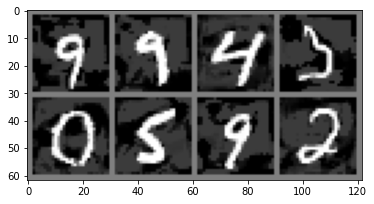

In [97]:
  from torchvision.utils import make_grid
  def fgsm_attack(input_image, epsilon, perturbation_grad, perturbation):
    sign_perturbation_grad = torch.sign(perturbation_grad.data)
    perturbation.data += torch.clamp(epsilon * sign_perturbation_grad, min = 0, max = 1)
    perturbed_image = input_image +  perturbation.data
    perturbed_image = torch.clamp(perturbed_image, -1, 1)
    perturbation.data = perturbed_image - input_image
    return perturbation

  error = nn.CrossEntropyLoss()
  fig = plt.figure()
  while True:
    test_iterator=iter(test_loader)
    test_images, test_labels=test_iterator.next()
    test_images, test_labels=test_images.to(device), test_labels.to(device)
    output = model(test_images)
    predicted = torch.max(output.data, 1)[1] 
    if torch.equal(test_labels,predicted):
      break
  print("true label: {} ".format(test_labels.detach().cpu()))
  print("predicted label: {} ".format(predicted.detach().cpu()))
  orig_images=make_grid(test_images.detach(),nrow=4).cpu()
  plt.imshow(orig_images.permute(1,2,0)/2+0.5)
  plt.savefig(HOMEWORK_FOLDER+'/batch_untarget_original_image.png')
  plt.show()
  epsilon = 0.001
  num_training_episode = 1000000
  data = test_images
  target = test_labels
  model.eval()

  # Send the data and label to the device
  data, target = data.to(device), target.to(device)
  perturbation = torch.zeros(data.shape).to(device)
  perturbation.requires_grad = True

  for j in range(num_training_episode):
      model.zero_grad()
      output = model(data + perturbation)
      loss = error(output, target)
      loss.backward()
      perturbation_grad = perturbation.grad.data
      # Call FGSM Attack
      perturbation = fgsm_attack(data, epsilon, perturbation_grad, perturbation)
      
      # Re-classify the perturbed image
      output = model(data + perturbation)
      predicted = torch.max(output.data, 1)[1]  # get the index of the max log-probability
                
      # Calculate the loss       
      if j % 100 == 1:
        print('\nloss: {:.3f}, current_predict_label: {}\n'.format(
        loss.detach().cpu(), predicted.detach().cpu()))

      if (predicted-target).byte().all() and torch.max(output.data)>= 0.9:
        print("misclassified label: {} ".format(predicted.detach().cpu()))
        final_perturbed_image = (data + perturbation).detach().cpu()
        # final_perturbed_image = np.squeeze(final_perturbed_image)
        final_perturbed_image=make_grid(final_perturbed_image.detach(),nrow=4).cpu()
        plt.imshow(final_perturbed_image.permute(1,2,0)/2+0.5)
        plt.savefig(HOMEWORK_FOLDER+'/batch_untarget_new_image.png')
        plt.show()
        break
